Entropy from ensemble:  6.915251220661553
Mean field entropy:  6.931471805599453
1.0023456248255214


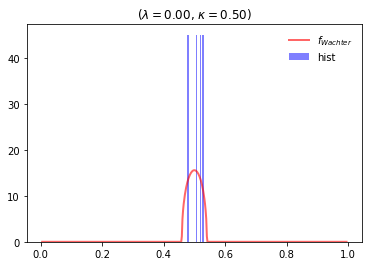

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
from scipy.stats import unitary_group
from dppy.beta_ensembles import JacobiEnsemble
from numpy import linalg as LA

m=10
m1=3000
m2=3000
lamb = m/(m1+m2)   #lambda
kappa = m1/(m1+m2)

jacobi = JacobiEnsemble(beta=2)  # beta must be in {0,1,2,4}, default beta=2

#There is another model: jacobi.sample_banded_model. I am not sure what's the difference.
x = jacobi.sample_full_model(size_N=m, size_M1=m1, size_M2=m2)  # M_1, M_2 >= N

jacobi.hist(normalization=True)
plt.title(r'($\lambda=$%.2f, $\kappa=$%.2f)'%( lamb , kappa ))
x = np.array(x)
S=m*sum(-x*np.log(x)-(1-x)*np.log(x))/len(x)
Smf = m*(-kappa*math.log(kappa)-(1-kappa)*math.log(1-kappa))
print('Entropy from ensemble: ',S)
print('Mean field entropy: ', Smf)
print(Smf/S)



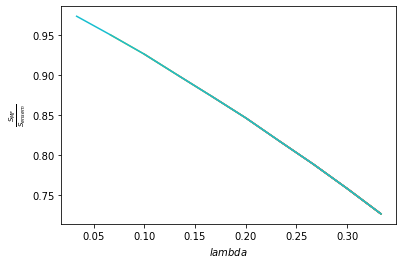

In [66]:
#Test the small-lambda limit of the entropy of the Jacobi ensemble.
#At small lambda, S from Jacobi ensemble agrees with the mean field entropy.
m1=3000
m2=3000
lamb = m/(m1+m2)
lamb_list=[]
kappa = m1/(m1+m2)
ratio = []
for i in range(2000,100,-200):
    m=i
    lamb = m/(m1+m2)
    lamb_list.append(lamb)
    kappa = m1/(m1+m2)
    jacobi = JacobiEnsemble(beta=2)  
    x = jacobi.sample_full_model(size_N=m, size_M1=m1, size_M2=m2)  
    S=m*sum(-x*np.log(x)-(1-x)*np.log(x))/len(x)
    Smf = m*(-kappa*math.log(kappa)-(1-kappa)*math.log(1-kappa))
    ratio.append(Smf/S)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$\frac{S_{MF}}{S_{ensem}}$')
    plt.plot(lamb_list, ratio)
    #plt.savefig('MF_limit.png',dpi=800)

alpha:  2.0
S_alpha 3.298601675407312
first term:  70.28060486734823
second term:  -140.40196668261999
last term:  73.41996349067907
alpha:  1.99
S_alpha 3.283089737141111
first term:  70.28060486734823
second term:  -141.11106752445139
last term:  74.11355239424427
alpha:  1.98
S_alpha 3.267561899555318
first term:  70.28060486734823
second term:  -141.83463981203445
last term:  74.82159684424154
alpha:  1.97
S_alpha 3.2520182248491665
first term:  70.28060486734823
second term:  -142.57313111585637
last term:  75.5445444733573
alpha:  1.96
S_alpha 3.2364587757348176
first term:  70.28060486734823
second term:  -143.32700765517455
last term:  76.28286156356114
alpha:  1.95
S_alpha 3.220883615437458
first term:  70.28060486734823
second term:  -144.09675527953104
last term:  77.03703402762027
alpha:  1.94
S_alpha 3.2052928076944056
first term:  70.28060486734823
second term:  -144.88288051291636
last term:  77.80756845326253
alpha:  1.93
S_alpha 3.189686416755521
first term:  70.280604

alpha:  1.38
S_alpha 2.3094304566853907
first term:  70.28060486734823
second term:  -254.94041318686266
last term:  186.9692387761998
alpha:  1.37
S_alpha 2.293069390583298
first term:  70.28060486734823
second term:  -259.93337075025585
last term:  191.9458352734909
alpha:  1.3599999999999999
S_alpha 2.276697220307881
first term:  70.28060486734823
second term:  -265.20371484494893
last term:  197.19980719790857
alpha:  1.35
S_alpha 2.2603140378971602
first term:  70.28060486734823
second term:  -270.77522145933847
last term:  202.75493062988738
alpha:  1.3399999999999999
S_alpha 2.243919935810851
first term:  70.28060486734823
second term:  -276.6744637569277
last term:  208.6377788253903
alpha:  1.33
S_alpha 2.227515006928172
first term:  70.28060486734823
second term:  -282.9312358907342
last term:  214.8781460303141
alpha:  1.3199999999999998
S_alpha 2.211099344544749
first term:  70.28060486734823
second term:  -289.5790562829038
last term:  221.50955076010032
alpha:  1.31
S_alp

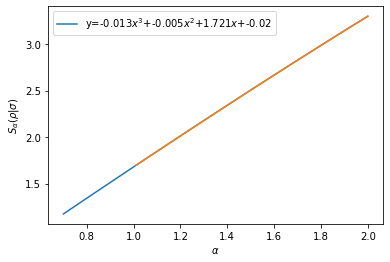

In [124]:
# Renyi relative entropy for SYK2 from correlation functions.
# S_alpha v.s. alpha
# It turned out that the relation is almost linear, which makes the extrapolation easy.

from scipy.stats import unitary_group
from numpy import linalg as LA
from scipy.linalg import fractional_matrix_power

m=100
m1=3000
m2=3000
lamb = m/(m1+m2)
kappa = m1/(m1+m2)
renyi_rel_S = []
identity = np.diag([1 for i in range(m)])

# C1_actual is C, C2_actual is C' .
# The eigenvalues of C and C' are sampled by the JacobiEnsemble.
# The eigenvectors are assumed to be that of random unitaries, which may or may not be correct.
C1_unitry = unitary_group.rvs(m)
C2_unitry = unitary_group.rvs(m)
jacobi1 = JacobiEnsemble(beta=2)  
jacobi2 = JacobiEnsemble(beta=2) #This is probably unnecessary, but just for safe that C and C' would be independent.
# Note that the following two variables, namely 'C1' and 'C2', are the sets of eigenvalues, not the matrices.
C1 = np.array(jacobi1.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
C2 = np.array(jacobi2.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
C1_actual = np.dot(np.dot(C1_unitry.conj().T,np.diag(C1)),C1_unitry)
C2_actual = np.dot(np.dot(C2_unitry.conj().T,np.diag(C2)),C2_unitry)

#The eigenvalues of I-C and I-C' .
ev_1_minus_C1,_ = LA.eig(identity-C1_actual)
ev_1_minus_C2,_ = LA.eig(identity-C2_actual)
ev_1_minus_C1 = np.real(ev_1_minus_C1)
ev_1_minus_C2 = np.real(ev_1_minus_C2)


for alpha in np.linspace(2,1.01,100):
    # Calculate the term ( ( c/1-c )... ( c/1-c))^alpha, named 'last_term' here. #
    x1 = np.power(C1/(1-C1),(1-alpha)/(2*alpha))
    x2 = C2/(1-C2)
    last_term = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(C1_unitry.conj().T, np.diag(x1)),C1_unitry),C2_unitry.conj().T), np.diag(x2)),C2_unitry),C1_unitry.conj().T), np.diag(x1)),C1_unitry)
    
    ev, _ = LA.eig(identity+fractional_matrix_power(last_term,alpha))
    ev = np.real(ev)
    final = np.real(sum(np.log(ev)))
    S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*final
    renyi_rel_S.append(S_alpha)
    
#I used cubic fit because of some accidents. I believe linear fit would work just fine.
s3, s2, s1, s0 = np.polyfit(np.linspace(2,1.01,100)[10:50], renyi_rel_S[10:50],3)
plt.plot(np.linspace(2,0.7,100), [s3*i**3+s2*i**2+s1*i+s0 for i in np.linspace(2,0.7,100)],label=r'y=%.3f$x^3$+%.3f$x^2$+%.3f$x$+%.2f'%(s3,s2,s1,s0))

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$S_\alpha (\rho\|\sigma)$')
plt.legend()
plt.plot(np.linspace(2,1.01,100), renyi_rel_S)
#plt.savefig('relative_renyi_S_vs_alpha.png',dpi=800)

print('Relative entropy at alpha=1: ',sum((s3,s2,s1,s0)))

[0.05]
[0.053471112942887755]
[0.05, 0.1]
[0.053471112942887755, 0.10739839773484652]
[0.05, 0.1, 0.15]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149]
[0.05, 0.1, 0.15, 0.2]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149, 0.23550719729620312]
[0.05, 0.1, 0.15, 0.2, 0.25]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149, 0.23550719729620312, 0.3056947047796536]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149, 0.23550719729620312, 0.3056947047796536, 0.3887362238714858]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149, 0.23550719729620312, 0.3056947047796536, 0.3887362238714858, 0.4828333832196461]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
[0.053471112942887755, 0.10739839773484652, 0.1685079209159149, 0.23550719729620312, 0.3056947047796536, 0.3887362238714858, 0.4828333832196461, 0.5986740383009542]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.

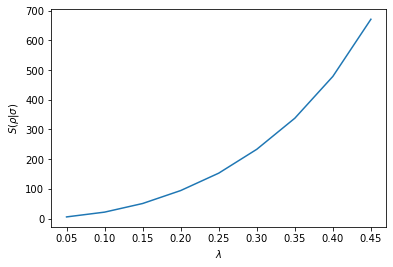

In [141]:
#Quantum relative entropy v.s. the subsystem size.
#This is done with fixed kappa=1/2. Maybe it would be fun to try some other kappa's. 
#S_alpha=1 v.s. lambda

#It turned out that 2000 by 2000 matrix is a bit too large and will take a long time to run
#Maybe, say, 500 would be enough.
m1=1000
m2=1000

list_S_1=[]
list_S_1_avg=[]
list_lambda=[]
for i in range(100,1000,100):
    m=i
    identity = np.diag([1 for i in range(m)])
    lamb = m/(m1+m2)
    list_lambda.append(lamb)
    kappa = m1/(m1+m2)
    renyi_rel_S = []
    C1_unitry = unitary_group.rvs(m)
    C2_unitry = unitary_group.rvs(m)
    jacobi1 = JacobiEnsemble(beta=2)  
    jacobi2 = JacobiEnsemble(beta=2) 
    C1 = np.array(jacobi1.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C2 = np.array(jacobi2.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C1_actual = np.dot(np.dot(C1_unitry.conj().T,np.diag(C1)),C1_unitry)
    C2_actual = np.dot(np.dot(C2_unitry.conj().T,np.diag(C2)),C2_unitry)

    ev_1_minus_C1,_ = LA.eig(identity-C1_actual)
    ev_1_minus_C2,_ = LA.eig(identity-C2_actual)
    ev_1_minus_C1 = np.real(ev_1_minus_C1)
    ev_1_minus_C2 = np.real(ev_1_minus_C2)
    
    #100 steps are too much!!! It will take forever if m=3000.
    for alpha in np.linspace(2,1.01,20):
        x1 = np.power(C1/(1-C1),(1-alpha)/(2*alpha))
        x2 = C2/(1-C2)
        last_term = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(C1_unitry.conj().T, np.diag(x1)),C1_unitry),C2_unitry.conj().T), np.diag(x2)),C2_unitry),C1_unitry.conj().T), np.diag(x1)),C1_unitry)
        ev, _ = LA.eig(identity+fractional_matrix_power(last_term,alpha))
        ev = np.real(ev)
        final = np.real(sum(np.log(ev)))
        S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*final
        renyi_rel_S.append(S_alpha)
    s3, s2, s1, s0 = np.polyfit(np.linspace(2,1.01,20), renyi_rel_S,3)
    list_S_1.append(sum((s3,s2,s1,s0)))
    list_S_1_avg.append(sum((s3,s2,s1,s0))/m)
    print(list_lambda)
    print(list_S_1_avg)
    

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$S(\rho\|\sigma)$')
plt.title(r'Quantum Relative Entropy ($\alpha=\frac{1}{2}$) v.s. Subsystem Size')
plt.plot(list_lambda, list_S_1)
#plt.savefig('S_1_vs_lambda.png',dpi=800)


plt.xlabel(r'$\lambda$')
plt.ylabel(r'$S(\rho\|\sigma)$')

In [150]:
#I'm curious if m1 = m2 = 500 is big enough. It turned out that the result is almost the same.

m1=500
m2=500

list_S_1=[]
list_S_1_avg=[]
list_lambda=[]
for i in range(50,500,50):
    m=i
    identity = np.diag([1 for i in range(m)])
    lamb = m/(m1+m2)
    list_lambda.append(lamb)
    kappa = m1/(m1+m2)
    renyi_rel_S = []
    C1_unitry = unitary_group.rvs(m)
    C2_unitry = unitary_group.rvs(m)
    jacobi1 = JacobiEnsemble(beta=2)  
    jacobi2 = JacobiEnsemble(beta=2) 
    C1 = np.array(jacobi1.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C2 = np.array(jacobi2.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C1_actual = np.dot(np.dot(C1_unitry.conj().T,np.diag(C1)),C1_unitry)
    C2_actual = np.dot(np.dot(C2_unitry.conj().T,np.diag(C2)),C2_unitry)

    ev_1_minus_C1,_ = LA.eig(identity-C1_actual)
    ev_1_minus_C2,_ = LA.eig(identity-C2_actual)
    ev_1_minus_C1 = np.real(ev_1_minus_C1)
    ev_1_minus_C2 = np.real(ev_1_minus_C2)
    
    #100 steps are too much!!! It will take forever if m=3000.
    for alpha in np.linspace(2,1.01,20):
        x1 = np.power(C1/(1-C1),(1-alpha)/(2*alpha))
        x2 = C2/(1-C2)
        last_term = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(C1_unitry.conj().T, np.diag(x1)),C1_unitry),C2_unitry.conj().T), np.diag(x2)),C2_unitry),C1_unitry.conj().T), np.diag(x1)),C1_unitry)
        ev, _ = LA.eig(identity+fractional_matrix_power(last_term,alpha))
        ev = np.real(ev)
        final = np.real(sum(np.log(ev)))
        S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*final
        renyi_rel_S.append(S_alpha)
    s3, s2, s1, s0 = np.polyfit(np.linspace(2,1.01,20), renyi_rel_S,3)
    list_S_1.append(sum((s3,s2,s1,s0)))
    list_S_1_avg.append(sum((s3,s2,s1,s0))/m)
    #print(list_lambda)
    #print(list_S_1_avg)
    

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$S(\rho\|\sigma)/m$')
plt.plot(list_lambda, list_S_1_avg)
#plt.savefig('relative_renyi_S_vs_alpha.png',dpi=800)



KeyboardInterrupt: 

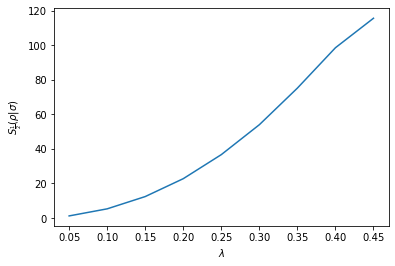

In [154]:
#log of fidelity v.s. the subsystem size.
#This is done with fixed kappa=1/2. Maybe it would be fun to try some other kappa's. 
#S_alpha=1/2 v.s. lambda
#I verified that the curve is very linear when 0<alpha<1, so we can handle it similarly.

m1=500
m2=500

list_log_F=[]
list_log_F_avg=[]
list_lambda=[]
for i in range(50,500,50):
    m=i
    identity = np.diag([1 for i in range(m)])
    lamb = m/(m1+m2)
    list_lambda.append(lamb)
    kappa = m1/(m1+m2)
    renyi_rel_S = []
    C1_unitry = unitary_group.rvs(m)
    C2_unitry = unitary_group.rvs(m)
    jacobi1 = JacobiEnsemble(beta=2)  
    jacobi2 = JacobiEnsemble(beta=2) 
    C1 = np.array(jacobi1.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C2 = np.array(jacobi2.sample_full_model(size_N=m, size_M1=m1, size_M2=m2))
    C1_actual = np.dot(np.dot(C1_unitry.conj().T,np.diag(C1)),C1_unitry)
    C2_actual = np.dot(np.dot(C2_unitry.conj().T,np.diag(C2)),C2_unitry)

    ev_1_minus_C1,_ = LA.eig(identity-C1_actual)
    ev_1_minus_C2,_ = LA.eig(identity-C2_actual)
    ev_1_minus_C1 = np.real(ev_1_minus_C1)
    ev_1_minus_C2 = np.real(ev_1_minus_C2)

    for alpha in np.linspace(0.9,0.1,20):

        x1 = np.power(C1/(1-C1),(1-alpha)/(2*alpha))
        x2 = C2/(1-C2)
        last_term = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(C1_unitry.conj().T, np.diag(x1)),C1_unitry),C2_unitry.conj().T), np.diag(x2)),C2_unitry),C1_unitry.conj().T), np.diag(x1)),C1_unitry)
        ev, _ = LA.eig(identity+fractional_matrix_power(last_term,alpha))
        ev = np.real(ev)
        final = np.real(sum(np.log(ev)))
        S_alpha = -sum(np.log(ev_1_minus_C1))-alpha/(1-alpha)*sum(np.log(ev_1_minus_C2))-1/(1-alpha)*final
        renyi_rel_S.append(S_alpha)
    s1, s0 = np.polyfit(np.linspace(0.9,0.1,20), renyi_rel_S,1)
    list_log_F.append(s1*0.5+s0)
    list_log_F_avg.append((s1*0.5+s0)/m)

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$S_{\frac{1}{2}}(\rho\|\sigma)$')
plt.title(r'Log of the Fidelity ($\alpha=\frac{1}{2}$) v.s. Subsystem Size')
plt.plot(list_lambda, list_log_F)
#plt.savefig('log_F_vs_lambda.png',dpi=800)
